# **1. *Import Library***

In [36]:
import pandas as pd #untuk manipulasi dan analisis data dalam Data Frame
import numpy as np #untuk komputasi numerik, terutama dalam vektor dan matriks
import statsmodels.api as sm #untuk analisis statistik berupa model regresi
import matplotlib.pyplot as plt #untuk visualisasi data dalam bentuk grafis
import scipy.stats as stats #untuk komputasi ilmiah dan statistik seperti uji t, F, dll

# **2. Data**

## **a. Membaca Data**

Jangan lupa untuk upload *file data* terlebih dahulu dan mengganti alamat data (*path*) yang sesuai. Jika *file* berupa csv, gunakan fungsi `pd.read_csv()`

In [37]:
data = pd.read_excel("Data Bintang.xlsx", sheet_name="Data")
data.head()

,Wilayah,PPM,IPM,RLS,JP,PBH,TBS,ASL,TPT,PDRB,JSM,UHH,LLR,PKB
0,Sumba Barat,27.17,65.22,6.92,152414,11.90,0.39,58.83,3.52,10199,12696,67.57,3.93,82.84
1,Sumba Timur,28.08,67.05,7.57,255498,5.87,0.30,61.81,2.21,16617,36053,65.82,2.02,68.79
2,Kupang,21.78,65.82,7.42,376837,6.17,1.18,76.42,3.22,13793,59622,65.64,4.20,72.78
3,Timor Tengah Selatan,25.18,63.58,6.97,474521,7.71,1.03,67.93,2.64,10953,57201,66.89,2.09,83.83
4,Timor Tengah Utara,21.85,65.16,8.16,271277,3.98,0.45,80.56,1.96,11511,42634,67.61,1.20,77.65


## **b. Menyesuaikan Peubah**

Untuk mempermudah pemanggilan peubah pada saat eksplorasi dan analisis, jika pada file masih mengggunakan nama peubah yang panjang, maka bisa diganti dengan menggunakan fungsi `data.columns`. Kolom wilayah juga dapat dihapus dengan menggunakan fungsi `data.drop(columns=["NamaPeubah"])`.

In [38]:
data.columns = ["Wilayah", "Y"] + [f"X{i}" for i in range(1, 13)]
data = data.drop(columns=["Wilayah"])
data.head()

,Y,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12
0,27.17,65.22,6.92,152414,11.90,0.39,58.83,3.52,10199,12696,67.57,3.93,82.84
1,28.08,67.05,7.57,255498,5.87,0.30,61.81,2.21,16617,36053,65.82,2.02,68.79
2,21.78,65.82,7.42,376837,6.17,1.18,76.42,3.22,13793,59622,65.64,4.20,72.78
3,25.18,63.58,6.97,474521,7.71,1.03,67.93,2.64,10953,57201,66.89,2.09,83.83
4,21.85,65.16,8.16,271277,3.98,0.45,80.56,1.96,11511,42634,67.61,1.20,77.65


# **3. Eksplorasi Data**

In [39]:
n = len(data)  # Jumlah observasi

Saat ini terdapat 1 peubah Y dan 12 peubah X, misal ingin dilakukan eksplorasi dan analisis terkait peubah X6

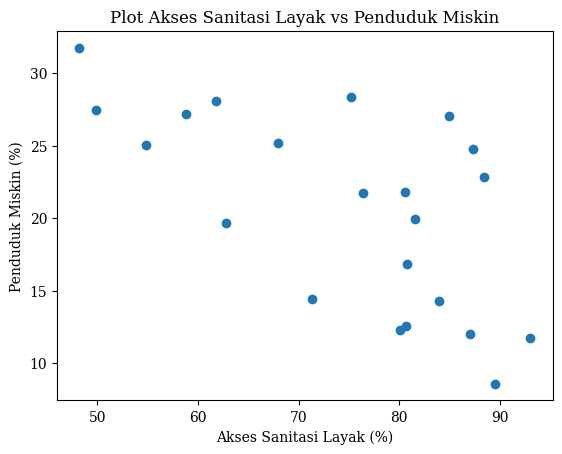

In [43]:
plt.scatter(data["X6"], data["Y"])
plt.xlabel("Akses Sanitasi Layak (%)")
plt.ylabel("Penduduk Miskin (%)")
plt.title("Plot Akses Sanitasi Layak vs Penduduk Miskin")
plt.show()

In [44]:
data["Y"].describe() #ringkasan data peubah Y

,Y
count,22.000000
mean,20.635000
std,6.764348
min,8.610000
25%,14.330000
50%,21.815000
75%,26.582500
max,31.780000


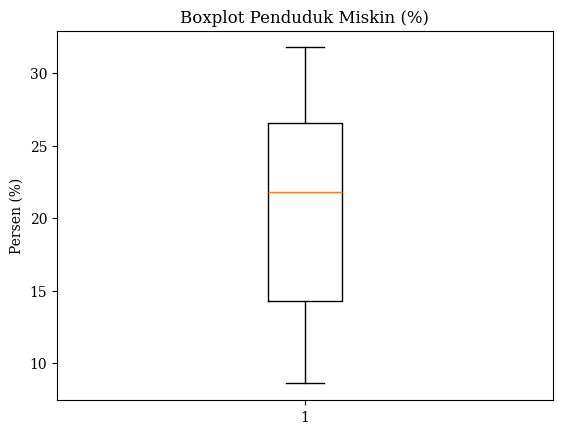

In [45]:
plt.boxplot(data["Y"])
plt.title("Boxplot Penduduk Miskin (%)")
plt.ylabel("Persen (%)")
plt.show()

In [46]:
data["X6"].describe() #ringkasan data peubah X6

,X6
count,22.000000
mean,74.775455
std,13.391926
min,48.220000
25%,64.052500
50%,80.310000
75%,84.677500
max,93.030000


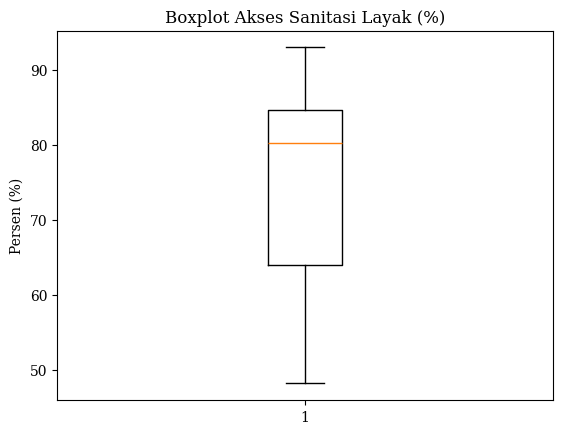

In [47]:
plt.boxplot(data["X6"])
plt.title("Boxplot Akses Sanitasi Layak (%)")
plt.ylabel("Persen (%)")
plt.show()

# **4. Pembentukan Model**

## **a. Manual**

### Koefisien Regresi



$\hat{y_i}=\hat{\beta_0}+\hat{\beta_1}x_i$, $i=1,2,...,n$

$\hat{\beta_1}=\frac{\sum(y_i-\bar{y})(x_i-\bar{x}))}{\sum(x_i-\bar{x})^2}=\frac{S_{xx}}{S_{xy}}$ atau  

$\hat{\beta_1}=\frac{\sum(x_iy)-\frac{\sum(x_i)\sum(y)}{n}}{\sum(x_i^2)-\frac{\sum(x_i^2)}{n}}$

$\hat{\beta_0}=\bar{y}-\hat{\beta_1}\bar{x}$

In [48]:
x = data["X6"]
y = data["Y"]

b1 = (np.sum(x * y) - np.sum(x) * np.sum(y) / n) / (np.sum(x**2) - (np.sum(x)**2 / n))
b0 = np.mean(y) - b1 * np.mean(x)

print(f"Koefisien b0: {b0:.4f}")
print(f"Koefisien b1: {b1:.4f}")

Koefisien b0: 44.7632
Koefisien b1: -0.3227


### Standar Error

In [49]:
galat = y - (b0 + b1 * x)
ragam_galat = np.sum(galat**2) / (n - 2)

se_b0 = np.sqrt(ragam_galat * (1/n + np.mean(x)**2 / np.sum((x - np.mean(x))**2)))
se_b1 = np.sqrt(ragam_galat / np.sum((x - np.mean(x))**2))

print(f"Standar error b0: {se_b0:.4f}")
print(f"Standar error b1: {se_b1:.4f}")

Standar error b0: 6.5963
Standar error b1: 0.0869


### Uji Signifikansi Parsial (uji-t)

In [50]:
t_b0 = b0 / se_b0
t_b1 = b1 / se_b1

p_b0 = 2 * stats.t.sf(abs(t_b0), df=n-2)
p_b1 = 2 * stats.t.sf(abs(t_b1), df=n-2)

print(f"Nilai t pada b0: {t_b0:.4f}, dengan nilai p sebesar {p_b0:.4f}")
print(f"Nilai t pada b1: {t_b1:.4f}, dengan nilai p sebesar {p_b1:.4f}")

Nilai t pada b0: 6.7861, dengan nilai p sebesar 0.0000
Nilai t pada b1: -3.7134, dengan nilai p sebesar 0.0014


### Koefisien Determinasi dan *Adjusted R-Square*

In [51]:
r = (np.sum(x * y) - np.sum(x) * np.sum(y) / n) / np.sqrt(
    (np.sum(x**2) - (np.sum(x)**2 / n)) * (np.sum(y**2) - (np.sum(y)**2 / n))
)
r_squared = r**2
adj_r_squared = 1 - ((1 - r_squared) * (n - 1) / (n - 2))

print(f"Koefisien Determinasi (R²): {r_squared:.4f}")
print(f"Koefisien Determinasi Penyesuaian (Adjusted R²): {adj_r_squared:.4f}")

Koefisien Determinasi (R²): 0.4081
Koefisien Determinasi Penyesuaian (Adjusted R²): 0.3785


### Uji Signifikansi Simultan (F-test)

In [52]:
JKG = np.sum((y - (b0 + b1 * x))**2)
JKReg = np.sum(((b0 + b1 * x) - np.mean(y))**2)
JKT = JKReg + JKG

dbReg = 1
dbg = n - 2
dbt = n - 1

F_hit = (JKReg / dbReg) / (JKG / dbg)
p_Fhit = 1 - stats.f.cdf(F_hit, dbReg, dbg)

print(f"F-statistic: {F_hit:.4f}, dengan nilai p sebesar {p_Fhit:.4f}")

F-statistic: 13.7894, dengan nilai p sebesar 0.0014


## **b. Fungsi pada Statsmodel**

In [53]:
X = sm.add_constant(data["X6"])  # Menambahkan intercept ke model
model = sm.OLS(data["Y"], X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.408
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     13.79
Date:                Mon, 03 Feb 2025   Prob (F-statistic):            0.00137
Time:                        14:16:22   Log-Likelihood:                -66.993
No. Observations:                  22   AIC:                             138.0
Df Residuals:                      20   BIC:                             140.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.7632      6.596      6.786      0.0

# **5. Kesimpulan**

Model yang terbentuk adalah sebagai berikut:

$$
\hat{Y}=44.7632-0.3227X_6
$$

dengan Y adalah persentase penduduk miskin dan X6 adalah persentase akses sanitasi layak.  

Didapatkan nilai $\hat{\beta_0}=44.7632$ artinya nilai dugaan rataan persentase penduduk miskin ketika akses sanitasi layak bernilai 0 persen adalah 44.7632%, akan tetapi nilai 0 tidak ada dalam selang pengamatan persentase akses sanitasi layak sehingga $\hat{\beta_0}$ tidak dapat didefinisikan lebih lanjut   

Nilai $\hat{\beta_1}=-0.3227$ artinya nilai dugaan perubahan dugaan rataan persentase penduduk miskin jika persentase akses sanitasi layak berubah satu persen adalah sebesar -0.3227%  

Koefisien determinasi yang dihasilkan adalah 0.4081 atau 40.81% artinya keragaman persentase penduduk miskin yang dapat dijelaskan oleh persentase akses sanitasi layak adalah sebesar 40.81%, sisanya yaitu 59.19% dijelaskan oleh peubah lain yang tidak dimasukkan dalam model.
